<a href="https://colab.research.google.com/github/pmilks/cap-comp215/blob/main/Project%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Database Creation

In [22]:
import json, requests, os, pprint
from pprint import pprint
import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt
from IPython.display import Image

client_id = 'lsNiv49bimpMq7ObIMsu34JI'
client_secret = 'lRt51ghfyTpL4lAQ5Xwr9o8QMI4RMM4aUeIlJ3Guz7OFBGtV'

class Photo:
  def __init__(self, id, keywords):
    self.id = id
    self.keywords = keywords

  def __str__(self):
    return f"{self.id}: {self.keywords}"

  @classmethod
  def Categorize(cls, id):
    with open(id,'rb') as image:
      data = {'data': image}
      keywords = requests.post('https://api.everypixel.com/v1/keywords', files=data,
                               auth=(client_id, client_secret)).json()['keywords']
      categories = {entry['keyword']:entry['score'] for entry in keywords[:10]}
    return Photo(keywords=categories, id=id)
  
  def content_filter(self, *args):
    if set(self.keywords.keys()) & set(args):
      return True #Flagged content
    else:
      return False #Not flagged content

  def match_keywords(self, other):
    matching_kw = set(self.keywords.keys()) & set(other.keywords.keys())
    if not matching_kw:
      return
    return {match_kw:1-abs(self.keywords[match_kw]-other.keywords[match_kw]) for match_kw in matching_kw}
  
  def sort_most_matches(matches):
    return sorted([(k, len(matches[k])) for k in matches.keys()], key=lambda x:x[1], reverse=True)

  def similarity_score(self, other):
    #similarity of SELF TO OTHER
    comp = self.match_keywords(other)
    score = 0
    for kw in comp.keys():
      score += self.keywords[kw]*comp[kw]
    return score/len(self.keywords)
    #perfect match = 1
    #no match = 0

with open('bank.txt','r') as f:
  database = json.loads(f.read())
  database = [Photo(id=photo, keywords=database[photo]) for photo in database.keys()]

In [23]:
class Profile:
  def __init__(self, interests):
    self.interests = interests

  def __str__(self):
    return f"Interests:{self.interests}"

  def engagement(self, photo):
    for kw in photo.keywords.keys():
      if kw not in self.interests.keys():
        self.interests[kw] = 0.1*photo.keywords[kw]
      else:
        self.interests[kw] += (1-self.interests[kw])*(0.01**(1-photo.keywords[kw]))

  def no_engagement(self,photo):
    for kw in photo.keywords.keys():
      if kw in self.interests.keys():
        self.interests[kw] -= 0.025
        if self.interests[kw] <= 0:
          del self.interests[kw]

  def accuracy(self,photo):
    score = 0
    for kw in set(self.interests.keys()) & set(photo.keywords.keys()):
      score += self.interests[kw]*photo.keywords[kw]
    return score/len(self.interests.keys())

  def probability(self,database):
    accuracies = [(data, self.accuracy(data)) for data in database]
    no_inf = [acc for acc in accuracies if acc[1] == 0] #
    inf = [acc for acc in accuracies if acc[1] != 0]
    inf_sum = sum(j for i,j in inf)
    min = 0.8
    probabilities = []
    if len(no_inf) == 0:
      min = 1
    if len(inf) == 0:
      min = 0
    for acc in accuracies:
      if acc in inf:
        probabilities.append((acc[0], (acc[1]/inf_sum)*min))
      else:
        probabilities.append((acc[0], (1-min)/(len(no_inf))))
    return probabilities

def Scroll(profile, database):
  dyn_database = {prob[0]:prob[1] for prob in profile.probability(database)}
  while True:
    selec = choice(list(dyn_database.keys()),p=list(dyn_database.values()))
    print(selec.id)
    eng = input('Press Y to engage | Press N to ignore: ') == 'Y'
    if eng:
      profile.engagement(selec)
    else:
      profile.no_engagement(selec)
    del dyn_database[selec]
    dyn_database = {prob[0]:prob[1] for prob in profile.probability(dyn_database)}

Step 1. User uploads photo

Step 2. ML, NLP, Metadata tagging

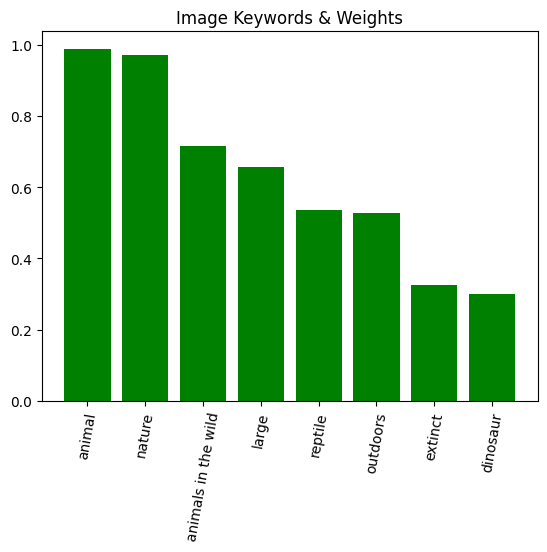

In [24]:
filephoto = 'dinosaur.jpg' #name
new_upload = Photo.Categorize(filephoto)
plt.bar(new_upload.keywords.keys(), new_upload.keywords.values(), color='g')
plt.title("Image Keywords & Weights")
plt.xticks(rotation=80)
plt.show()

Step 3. Content Flagging

In [25]:
if new_upload.content_filter('car'): #Replace hazard_tags
  print("Hazardous content: Rejected")
else:
  print("Suitable content: Accepted")
  database.append(new_upload)

Suitable content: Accepted


Step 4. Duplicate flagging

> *Introduced to "For You" page*



Step 5. Recommendation (User -> Photo)

In [26]:
user = Profile({'blank_null':0})
Scroll(user,database)

motorcycle.jpg
Press Y to engage | Press N to ignore: N
parrot.jpg
Press Y to engage | Press N to ignore: Y
dog.jpg
Press Y to engage | Press N to ignore: Y
cat.jpg
Press Y to engage | Press N to ignore: Y
horse.jpg
Press Y to engage | Press N to ignore: Y
maldives.jpg
Press Y to engage | Press N to ignore: N
dolphin.jpg
Press Y to engage | Press N to ignore: Y
golf.jpg
Press Y to engage | Press N to ignore: N
firefighter.jpg
Press Y to engage | Press N to ignore: N
tajmahal.jpg
Press Y to engage | Press N to ignore: N
wallofchina.jpg
Press Y to engage | Press N to ignore: N
petra.jpg
Press Y to engage | Press N to ignore: N
boat.jpg
Press Y to engage | Press N to ignore: N
construction.jpg
Press Y to engage | Press N to ignore: N
teacher.jpg
Press Y to engage | Press N to ignore: N
peru.jpg
Press Y to engage | Press N to ignore: N
dinosaur.jpg


KeyboardInterrupt: ignored